<a href="https://colab.research.google.com/github/Sheega-ameenah/HaqPay/blob/main/haqpay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('data_purchase.csv')

In [ ]:
df.head()


,text/csvID,User,Phone Number,Data,Price,Request ID,Data ID,CashBack,Network,Order ID,duration,Customer Type,ref,Profit,Purchase Type,Status,Date Time
0,1,43,NaN,NaN,155.0,NaN,NaN,5.0,Airtel,NaN,30days,individual,NaN,0.0,cheap data,NaN,2024-07-17 01:29:35.709049+00:00
1,2,1,9.075976e+09,NaN,95.0,NaN,NaN,3.0,Airtel,NaN,7days,individual,NaN,0.0,cheap data,NaN,2024-07-17 04:47:02.390377+00:00
2,3,1,8.033934e+09,500 MB,150.0,NaN,NaN,5.0,MTN,6.616230e+09,30days,individual,6616230156,0.0,cheap data,NaN,2024-07-17 05:12:22.035269+00:00
3,4,1,8.037113e+09,250 MB,80.0,NaN,NaN,3.0,MTN,6.616258e+09,30days,individual,6616258424,0.0,cheap data,NaN,2024-07-17 08:14:11.618116+00:00
4,34,44,9.075976e+09,300 MB,95.0,NaN,NaN,3.0,Airtel,6.616430e+09,7days,individual,6616430226,0.0,cheap data,NaN,2024-07-17 19:45:42.255974+00:00


 # Data Cleaning


In [ ]:
# Convert 'Date Time' to datetime
df['Date Time'] = pd.to_datetime(df['Date Time'], errors='coerce')
# Drop rows with missing 'Data', 'Price', or 'Network' as these are critical for analysis
cleaned_data = df.dropna(subset=['Data', 'Price', 'Network'])

# Convert 'Price' and 'Profit' to numeric to avoid any issues during aggregation
cleaned_data['Price'] = pd.to_numeric(cleaned_data['Price'], errors='coerce')
cleaned_data['Profit'] = pd.to_numeric(cleaned_data['Profit'], errors='coerce')
cleaned_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 190 entries, 2 to 191
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   text/csvID     190 non-null    object             
 1   User           190 non-null    int64              
 2   Phone Number   190 non-null    float64            
 3   Data           190 non-null    object             
 4   Price          190 non-null    float64            
 5   Request ID     161 non-null    object             
 6   Data ID        58 non-null     float64            
 7   CashBack       190 non-null    float64            
 8   Network        190 non-null    object             
 9   Order ID       77 non-null     float64            
 10  duration       190 non-null    object             
 11  Customer Type  190 non-null    object             
 12  ref            180 non-null    object             
 13  Profit         190 non-null    float64            
 14 

(None,
   text/csvID  User  Phone Number    Data  Price Request ID  Data ID  CashBack  \
 2          3     1  8.033934e+09  500 MB  150.0        NaN      NaN       5.0   
 3          4     1  8.037113e+09  250 MB   80.0        NaN      NaN       3.0   
 4         34    44  9.075976e+09  300 MB   95.0        NaN      NaN       3.0   
 5         35    43  8.033934e+09  500 MB  150.0        NaN      NaN       5.0   
 6         36    43  8.099334e+09  500 MB   90.0        NaN      NaN       5.0   
 
      Network      Order ID duration Customer Type         ref  Profit  \
 2        MTN  6.616230e+09   30days    individual  6616230156     0.0   
 3        MTN  6.616258e+09   30days    individual  6616258424     0.0   
 4     Airtel  6.616430e+09    7days    individual  6616430226     0.0   
 5        MTN  6.616472e+09   30days    individual  6616471891     0.0   
 6  m_9mobile  6.616472e+09   30days    individual  6616471923     0.0   
 
   Purchase Type Status                        Date T

In [ ]:
cleaned_data.head()


,text/csvID,User,Phone Number,Data,Price,Request ID,Data ID,CashBack,Network,Order ID,duration,Customer Type,ref,Profit,Purchase Type,Status,Date Time
2,3,1,8.033934e+09,500 MB,150.0,NaN,NaN,5.0,MTN,6.616230e+09,30days,individual,6616230156,0.0,cheap data,NaN,2024-07-17 05:12:22.035269+00:00
3,4,1,8.037113e+09,250 MB,80.0,NaN,NaN,3.0,MTN,6.616258e+09,30days,individual,6616258424,0.0,cheap data,NaN,2024-07-17 08:14:11.618116+00:00
4,34,44,9.075976e+09,300 MB,95.0,NaN,NaN,3.0,Airtel,6.616430e+09,7days,individual,6616430226,0.0,cheap data,NaN,2024-07-17 19:45:42.255974+00:00
5,35,43,8.033934e+09,500 MB,150.0,NaN,NaN,5.0,MTN,6.616472e+09,30days,individual,6616471891,0.0,cheap data,NaN,2024-07-18 04:49:31.440756+00:00
6,36,43,8.099334e+09,500 MB,90.0,NaN,NaN,5.0,m_9mobile,6.616472e+09,30days,individual,6616471923,0.0,cheap data,NaN,2024-07-18 04:50:06.836841+00:00


 # Data analysis and visualization

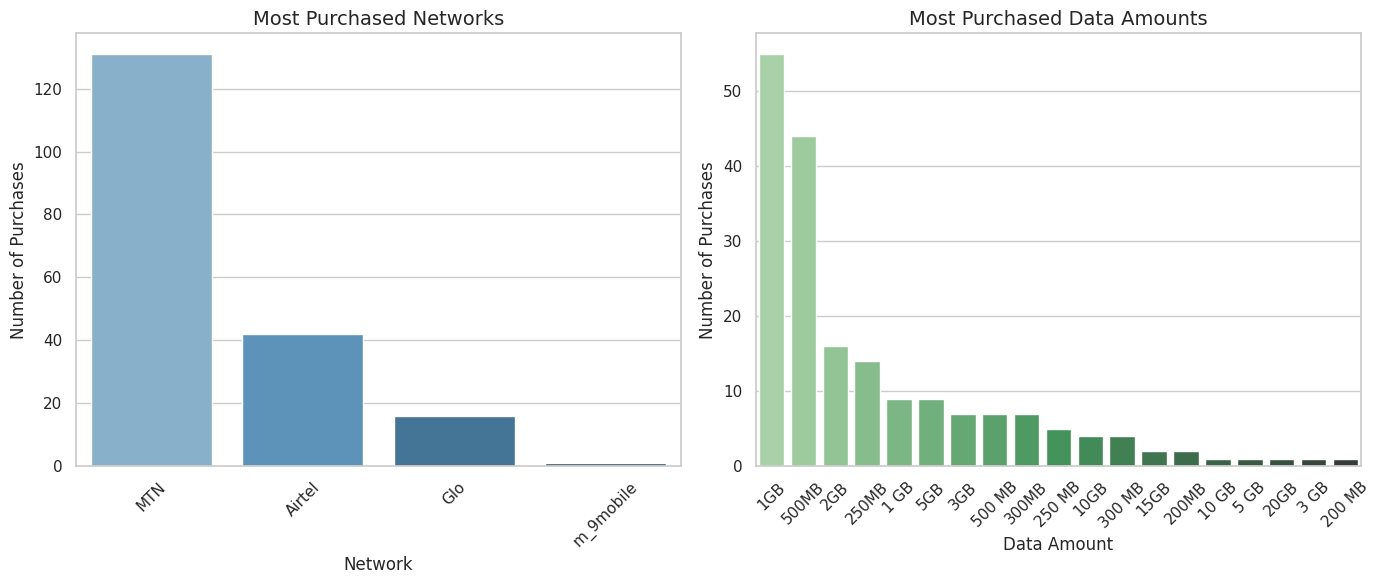

In [ ]:
# Set the visual style
sns.set(style="whitegrid")

# 1. Network that is most purchased
network_counts = cleaned_data['Network'].value_counts()

# 2. The data amount that is most purchased
data_counts = cleaned_data['Data'].value_counts()

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the network counts
sns.barplot(x=network_counts.index, y=network_counts.values, ax=axes[0], palette="Blues_d")
axes[0].set_title("Most Purchased Networks", fontsize=14)
axes[0].set_xlabel("Network", fontsize=12)
axes[0].set_ylabel("Number of Purchases", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Plot the data counts
sns.barplot(x=data_counts.index, y=data_counts.values, ax=axes[1], palette="Greens_d")
axes[1].set_title("Most Purchased Data Amounts", fontsize=14)
axes[1].set_xlabel("Data Amount", fontsize=12)
axes[1].set_ylabel("Number of Purchases", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout for readability
plt.tight_layout()

# Show the plots
plt.show()



visual insights:

1. **Most Purchased Networks**: MTN , AIRTEL.
   
2. **Most Purchased Data Amounts**: 1GB , 500MB.


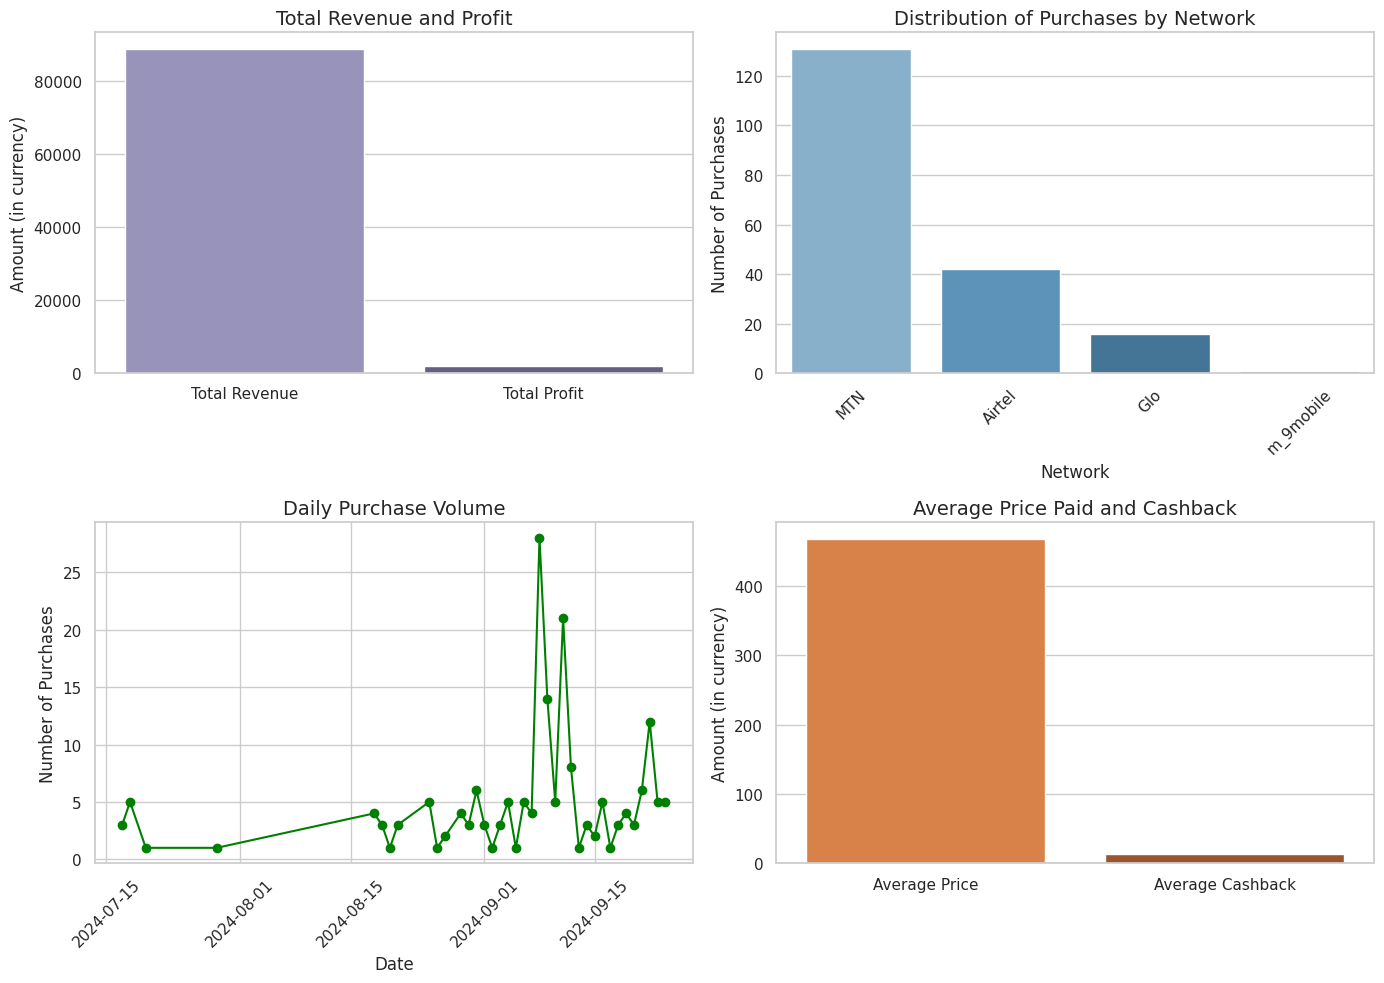

In [ ]:
# 3. Total revenue and profit from data purchases
total_revenue = cleaned_data['Price'].sum()
total_profit = cleaned_data['Profit'].sum()
# 4. Trends over time - Daily purchase volume
cleaned_data['Date'] = cleaned_data['Date Time'].dt.date
daily_purchases = cleaned_data.groupby('Date').size()

# 5. Customer behavior - Average price paid and cashback trends
avg_price = cleaned_data['Price'].mean()
avg_cashback = cleaned_data['CashBack'].mean()

# Visualization of the insights
fig, axes = plt.subplots(2, 2, figsize=(14, 10))


# Plot total revenue and profit
sns.barplot(x=['Total Revenue', 'Total Profit'], y=[total_revenue, total_profit], ax=axes[0, 0], palette="Purples_d")
axes[0, 0].set_title("Total Revenue and Profit", fontsize=14)
axes[0, 0].set_ylabel("Amount (in currency)", fontsize=12)

# Plot network distribution (reusing the network_counts from previous analysis)
sns.barplot(x=network_counts.index, y=network_counts.values, ax=axes[0, 1], palette="Blues_d")
axes[0, 1].set_title("Distribution of Purchases by Network", fontsize=14)
axes[0, 1].set_xlabel("Network", fontsize=12)
axes[0, 1].set_ylabel("Number of Purchases", fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot daily purchase trends
daily_purchases.plot(ax=axes[1, 0], color='green', marker='o')
axes[1, 0].set_title("Daily Purchase Volume", fontsize=14)
axes[1, 0].set_xlabel("Date", fontsize=12)
axes[1, 0].set_ylabel("Number of Purchases", fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot average price and cashback trends
sns.barplot(x=['Average Price', 'Average Cashback'], y=[avg_price, avg_cashback], ax=axes[1, 1], palette="Oranges_d")
axes[1, 1].set_title("Average Price Paid and Cashback", fontsize=14)
axes[1, 1].set_ylabel("Amount (in currency)", fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the visualizations
plt.show()
